In [41]:
import pandas as pd
import scipy.stats as sc_stats
import numpy as np
from tqdm import tqdm
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore")

In [2]:
data_streamchik = pd.read_csv('data_stream_res.csv')

In [3]:
data_streamchik.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,attr_user_score_type,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00000,8.0,E,3,82.539990
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.05835,8.6,E,2,40.240000
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00000,8.3,E,3,35.520000
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00000,8.0,E,3,32.770000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,72.65265,8.2,T,2,31.380001


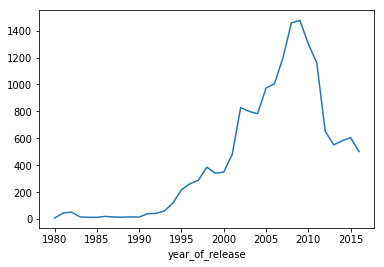

In [4]:
data_streamchik.groupby('year_of_release').count()['name'].plot()

In [5]:
data_streamchik.groupby('year_of_release').count()['name']

year_of_release
1980       9
1981      46
1982      53
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     290
1998     386
1999     341
2000     350
2001     482
2002     829
2003     800
2004     783
2005     973
2006    1006
2007    1197
2008    1457
2009    1476
2010    1302
2011    1161
2012     653
2013     552
2014     582
2015     606
2016     502
Name: name, dtype: int64

До 2009 данные не нужны (к 2009 растет - не интересно, интересует рецессия - после 2009)

In [6]:
platforms_max_list = data_streamchik[data_streamchik['year_of_release']>=2009].groupby('platform').count()['name'].sort_values(ascending  = False)[:5].index

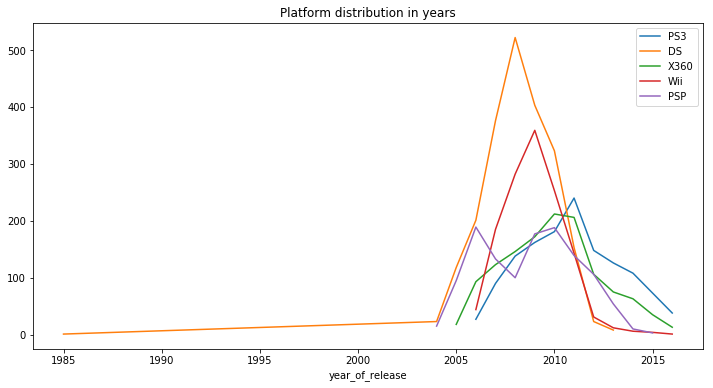

In [7]:
plt.figure(figsize=(12,6))
for platform in platforms_max_list:
    idx=data_streamchik['platform']==platform
    data_strem_subplatform = data_streamchik[idx]
    data_strem_subplatform.groupby('year_of_release').count()['name'].plot(label=platform)
plt.legend()
plt.title('Platform distribution in years')
plt.show()

Актуальный период - с 2009 года (общий для всего списка платформ)

На 2016 год продажи по каждой из платформ падают (PS2, DS, PS3, Wii, X360).

Потенциально прибыльные - X360, PS3

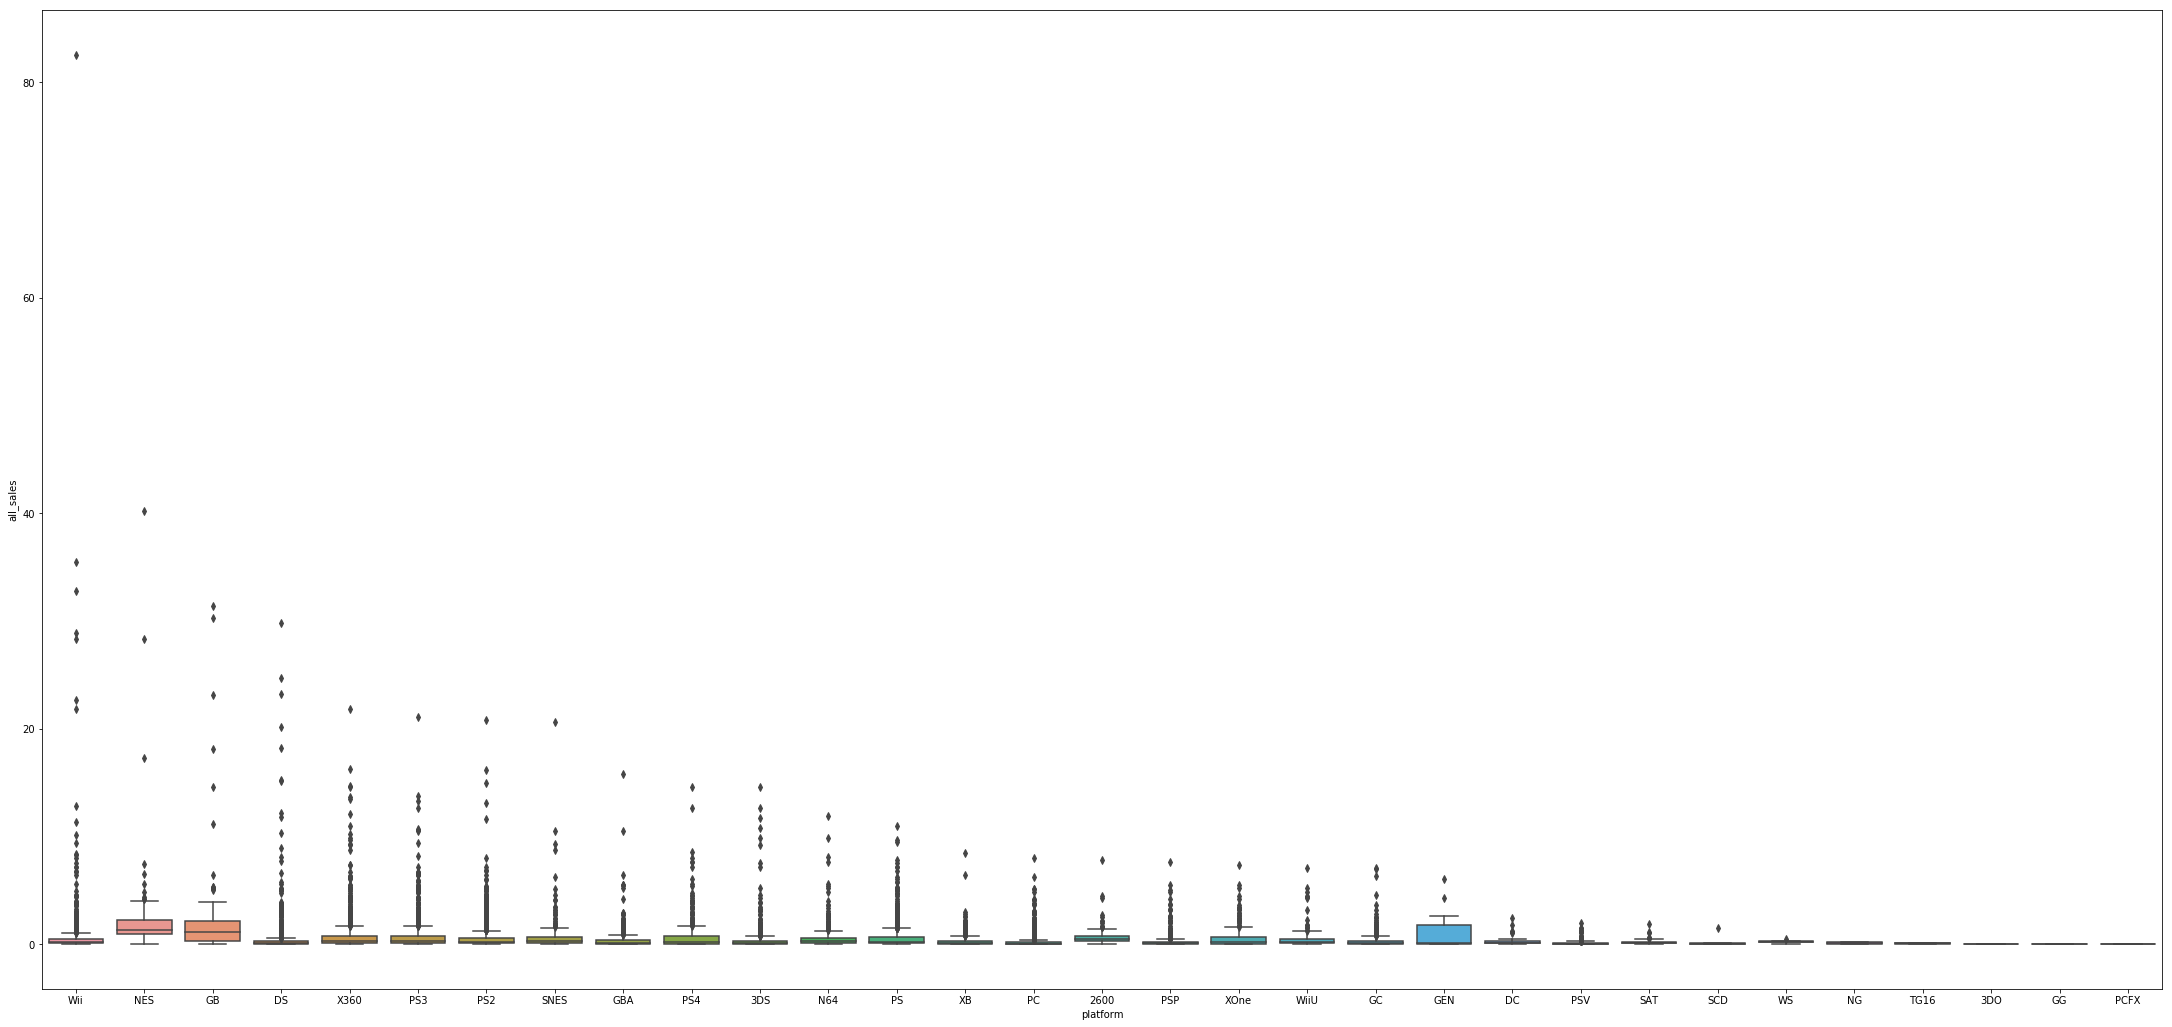

In [8]:
plt.figure(figsize=(38,18))
ax = sns.boxplot(x="platform", y="all_sales", data=data_streamchik)

In [9]:
ds_sub_ps3 = data_streamchik[data_streamchik['platform']=='PS3']

In [10]:
ds_sub_ps3.corr()[['critic_score', 'user_score']].iloc[-1]

critic_score    0.422179
user_score     -0.002853
Name: all_sales, dtype: float64

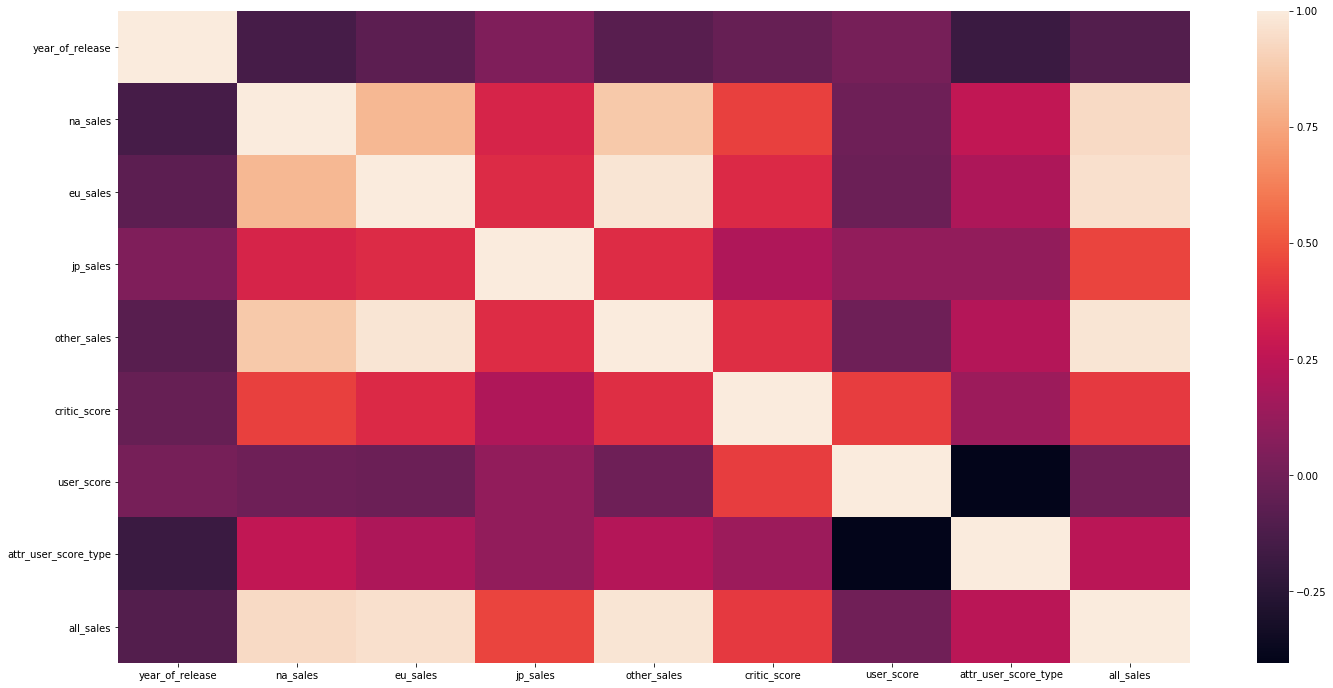

In [11]:
plt.figure(figsize=(24,12))
# sales_ps3 = ds_sub_ps3.pivot("all_sales", "user_score", "critic_score")
sns.heatmap(ds_sub_ps3.corr())

Количество продаж зависит от оценки критиков больше, чем от оценки пользователя.

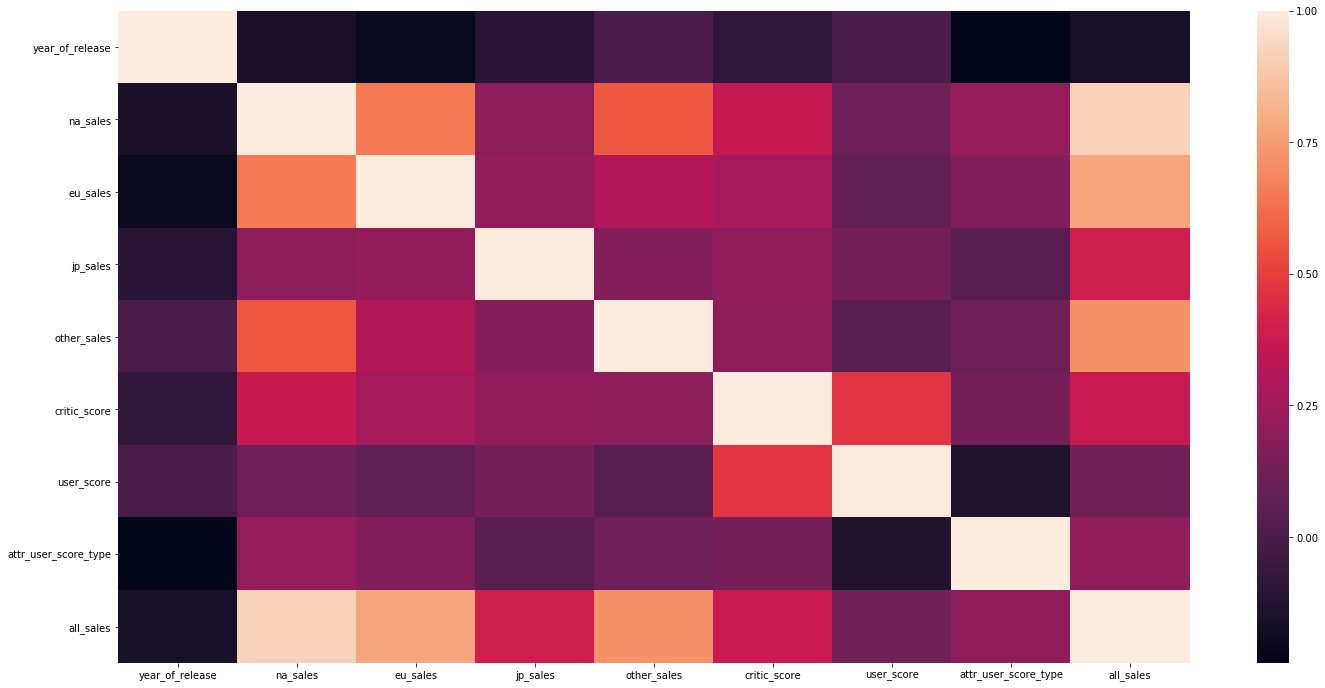

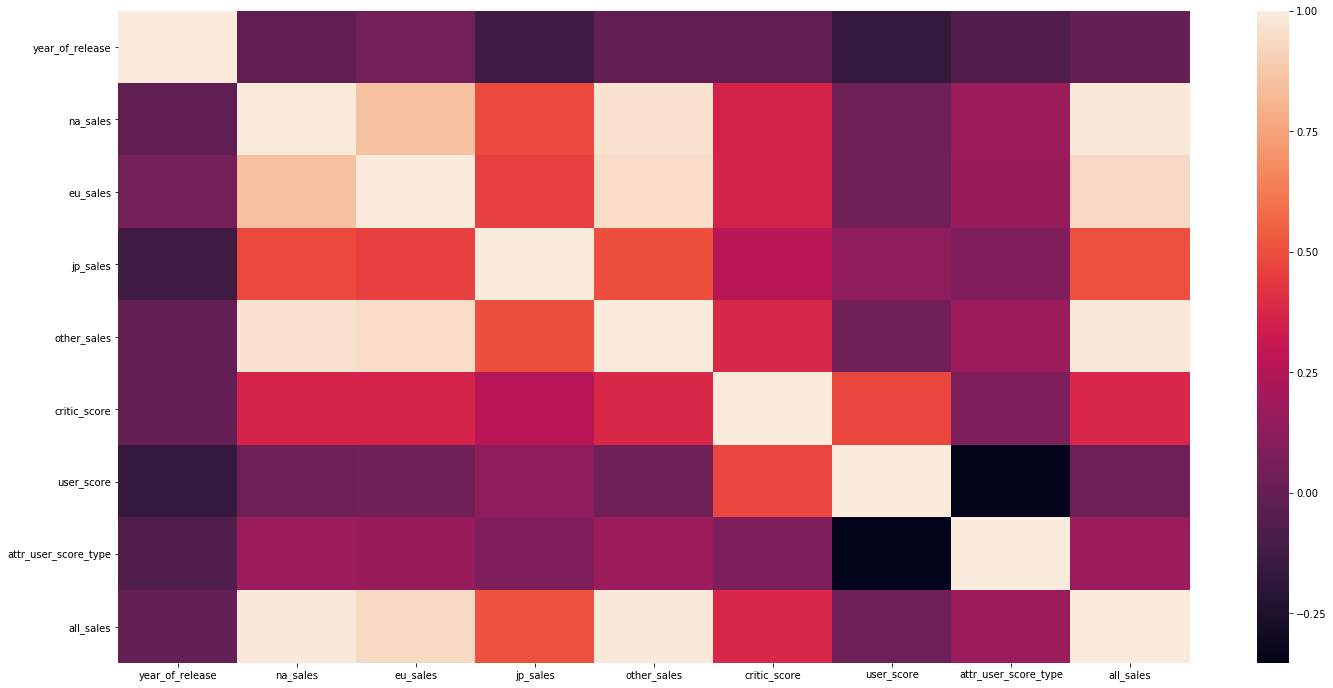

In [12]:
ds_sub_ps2 = data_streamchik[data_streamchik['platform']=='PS2']
plt.figure(figsize=(24,12))
sns.heatmap(ds_sub_ps2.corr())

ds_sub_X360 = data_streamchik[data_streamchik['platform']=='X360']
plt.figure(figsize=(24,12))
sns.heatmap(ds_sub_X360.corr())

Значение корреляции для разных платформ меняется, но тенденция прослеживается

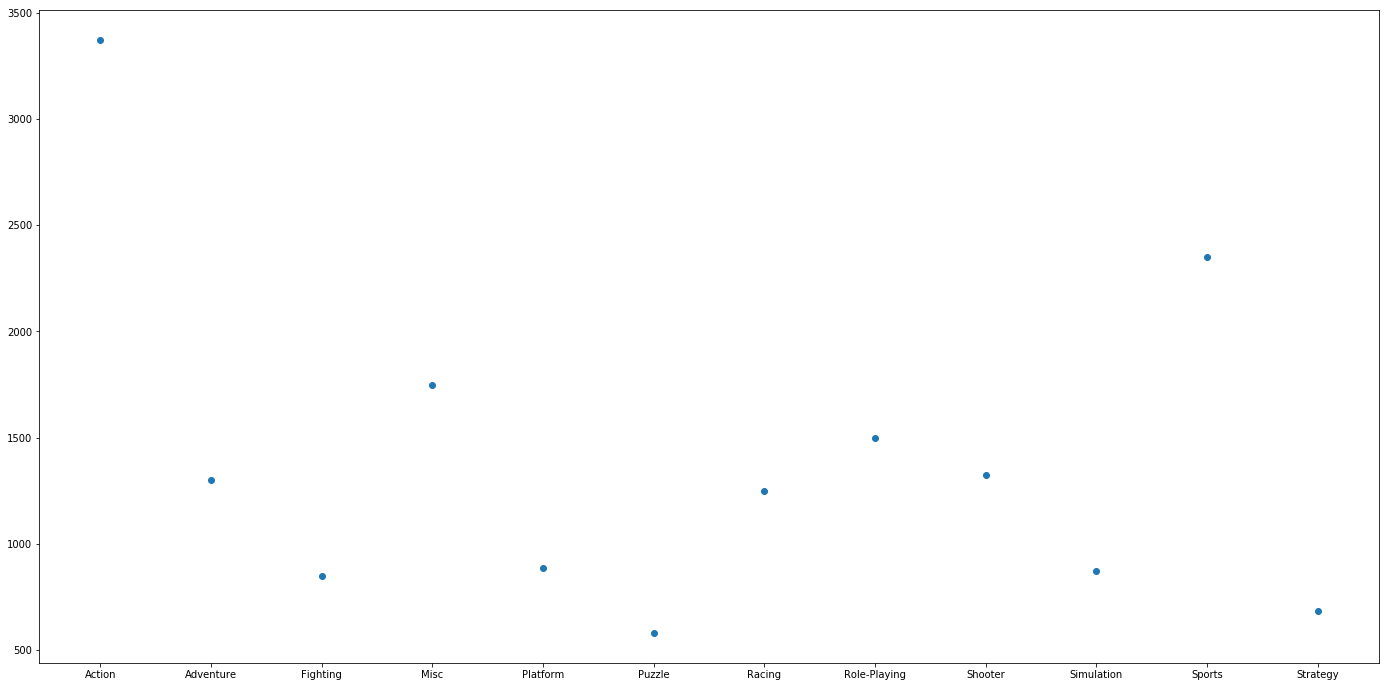

In [13]:
plt.figure(figsize=(24,12))
plt.scatter(data_streamchik.groupby('genre').count()['name'].index, data_streamchik.groupby('genre').count()['name'])

Больше всего продаж - у Action

меньше - у Puzzle

### Шаг 4. Составьте портрет пользователя каждого региона

Самые популярные платформы 3-х регионов:

In [37]:
n = 5
na_sales_top5 = data_streamchik.groupby('platform').mean()['na_sales'].sort_values(ascending  = False)[:n]
eu_sales_top5 = data_streamchik.groupby('platform').mean()['eu_sales'].sort_values(ascending  = False)[:n]
jp_sales_top5 = data_streamchik.groupby('platform').mean()['jp_sales'].sort_values(ascending  = False)[:n]

print('NA:', na_sales_top5)
print('EU:', eu_sales_top5)
print('JP:', jp_sales_top5)


NA: platform
NES     1.285102
GB      1.166531
GEN     0.725862
2600    0.681203
X360    0.477393
Name: na_sales, dtype: float64
EU: platform
GB      0.487959
PS4     0.359923
PS3     0.248152
NES     0.215816
X360    0.214548
Name: eu_sales, dtype: float64
JP: platform
NES     1.006633
GB      0.868571
SNES    0.487657
WS      0.236667
3DS     0.193596
Name: jp_sales, dtype: float64


Самые популярные жарны 3-х регионов

In [39]:
n = 5
na_genre_top5 = data_streamchik.groupby('genre').mean()['na_sales'].sort_values(ascending  = False)[:n]
eu_genre_top5 = data_streamchik.groupby('genre').mean()['eu_sales'].sort_values(ascending  = False)[:n]
jp_genre_top5 = data_streamchik.groupby('genre').mean()['jp_sales'].sort_values(ascending  = False)[:n]

print('NA:', na_genre_top5)
print('EU:', eu_genre_top5)
print('JP:', jp_genre_top5)

NA: genre
Platform    0.501689
Shooter     0.447649
Sports      0.291495
Racing      0.287710
Fighting    0.263086
Name: na_sales, dtype: float64
EU: genre
Shooter     0.239864
Platform    0.225619
Racing      0.189359
Sports      0.160473
Action      0.154156
Name: eu_sales, dtype: float64
JP: genre
Role-Playing    0.237256
Platform        0.147331
Fighting        0.103039
Puzzle          0.098810
Simulation      0.073081
Name: jp_sales, dtype: float64


Оценка влияния рейтинга на продажи в каждом регионе:

In [45]:
lb = LabelEncoder()
rating_encoder = lb.fit_transform(data_streamchik['rating'])

In [46]:
np.corrcoef(data_streamchik['na_sales'], rating_encoder)

array([[ 1.        , -0.00895257],
       [-0.00895257,  1.        ]])

In [48]:
np.corrcoef(data_streamchik['eu_sales'], rating_encoder)

array([[ 1.        , -0.00289004],
       [-0.00289004,  1.        ]])

In [49]:
np.corrcoef(data_streamchik['jp_sales'], rating_encoder)

array([[1.        , 0.03276864],
       [0.03276864, 1.        ]])

Рейтинг не влияет на продажи, смотрю на значения корреляции на побочной диагонали

### Шаг 5. Проверяем гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
$H_{0}$ = "Средние пользовательские рейтинги XboxOne и PC одинаковые"

$H_{1}$ = "Средние пользовательские рейтинги XboxOne и PC разные"

In [53]:
pc_list = data_streamchik[data_streamchik['platform']=='PC']['user_score']
XOne_list = data_streamchik[data_streamchik['platform']=='XOne']['user_score']

In [54]:
sc_stats.ttest_ind(pc_list, XOne_list)

Ttest_indResult(statistic=3.494409859453463, pvalue=0.0004921520892799913)

p_value = 0.0004922, принимаем
Средние пользовательские рейтинги платформ Xbox One и PC разные

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
$H_{0}$ = "Средние пользовательские рейтинги жанров Action и Sports одинаковые"

$H_{1}$ = "Средние пользовательские рейтинги жанров Action и Sports разные"

In [55]:
action_list = data_streamchik[data_streamchik['genre']=='Action']['user_score']
sport_list = data_streamchik[data_streamchik['genre']=='Sports']['user_score']
sc_stats.ttest_ind(action_list, sport_list)

Ttest_indResult(statistic=2.574564544962786, pvalue=0.010061566412285764)

pvalue=0.010062 ($H_{0}$ отклоняется)

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.